<a href="https://colab.research.google.com/github/ayush-t02/covid-19-prediction/blob/main/AIML_Minor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
df = pd.read_csv('covid.csv')

In [ ]:
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2


In [ ]:
df.columns

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu'],
      dtype='object')

In [ ]:
df.isnull().sum()

id                     0
sex                    0
patient_type           0
entry_date             0
date_symptoms          0
date_died              0
intubed                0
pneumonia              0
age                    0
pregnancy              0
diabetes               0
copd                   0
asthma                 0
inmsupr                0
hypertension           0
other_disease          0
cardiovascular         0
obesity                0
renal_chronic          0
tobacco                0
contact_other_covid    0
covid_res              0
icu                    0
dtype: int64

In [ ]:
df.drop(columns={'entry_date','date_died','date_symptoms','id'},axis=1,inplace=True)
df.shape

(566602, 19)

In [ ]:
df['covid_res'].value_counts().to_frame()

,covid_res
2,279035
1,220657
3,66910


Replacing 1 with 1, 2 with 0, 3 with 2

In [ ]:
df['covid_res'].replace([1,2,3],[1,0,2],inplace=True)
df['covid_res'].value_counts().to_frame()

,covid_res
0,279035
1,220657
2,66910


0 - negative,
1 - postive,
2 - awaiting

Text(0.5, 1.0, 'Covid Result')

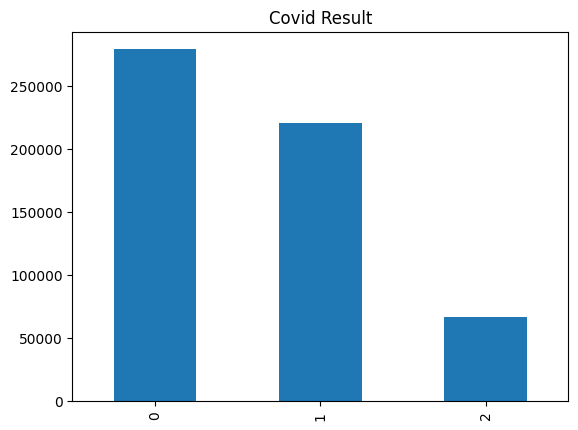

In [ ]:
df['covid_res'].value_counts().sort_index().plot.bar()
plt.title('Covid Result')

In [ ]:
df.rename(columns={'covid_res':'Chance'},inplace=True)
df.head()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,Chance,icu
0,2,1,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97
1,2,1,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97
2,1,2,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,2,2,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,1,2,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2


In [ ]:
df=df[df['Chance']!=2]

Basically ignoring the awaiting(2) column to simplify the prediction. so now the prediction will be either positive(0) or negative(1)

Text(0.5, 1.0, 'Chance')

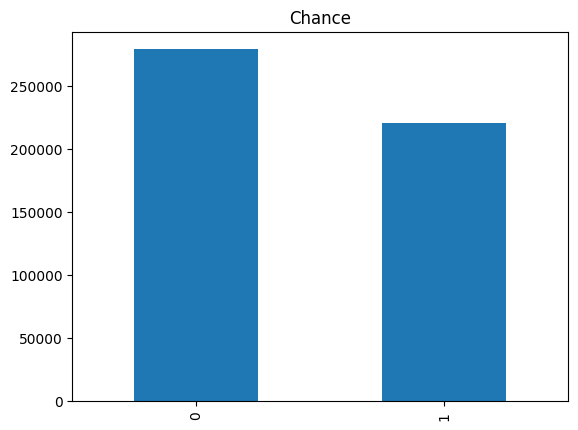

In [ ]:
df['Chance'].value_counts().sort_index().plot.bar()
plt.title('Chance')

Text(0.5, 1.0, 'Correlation heatmap')

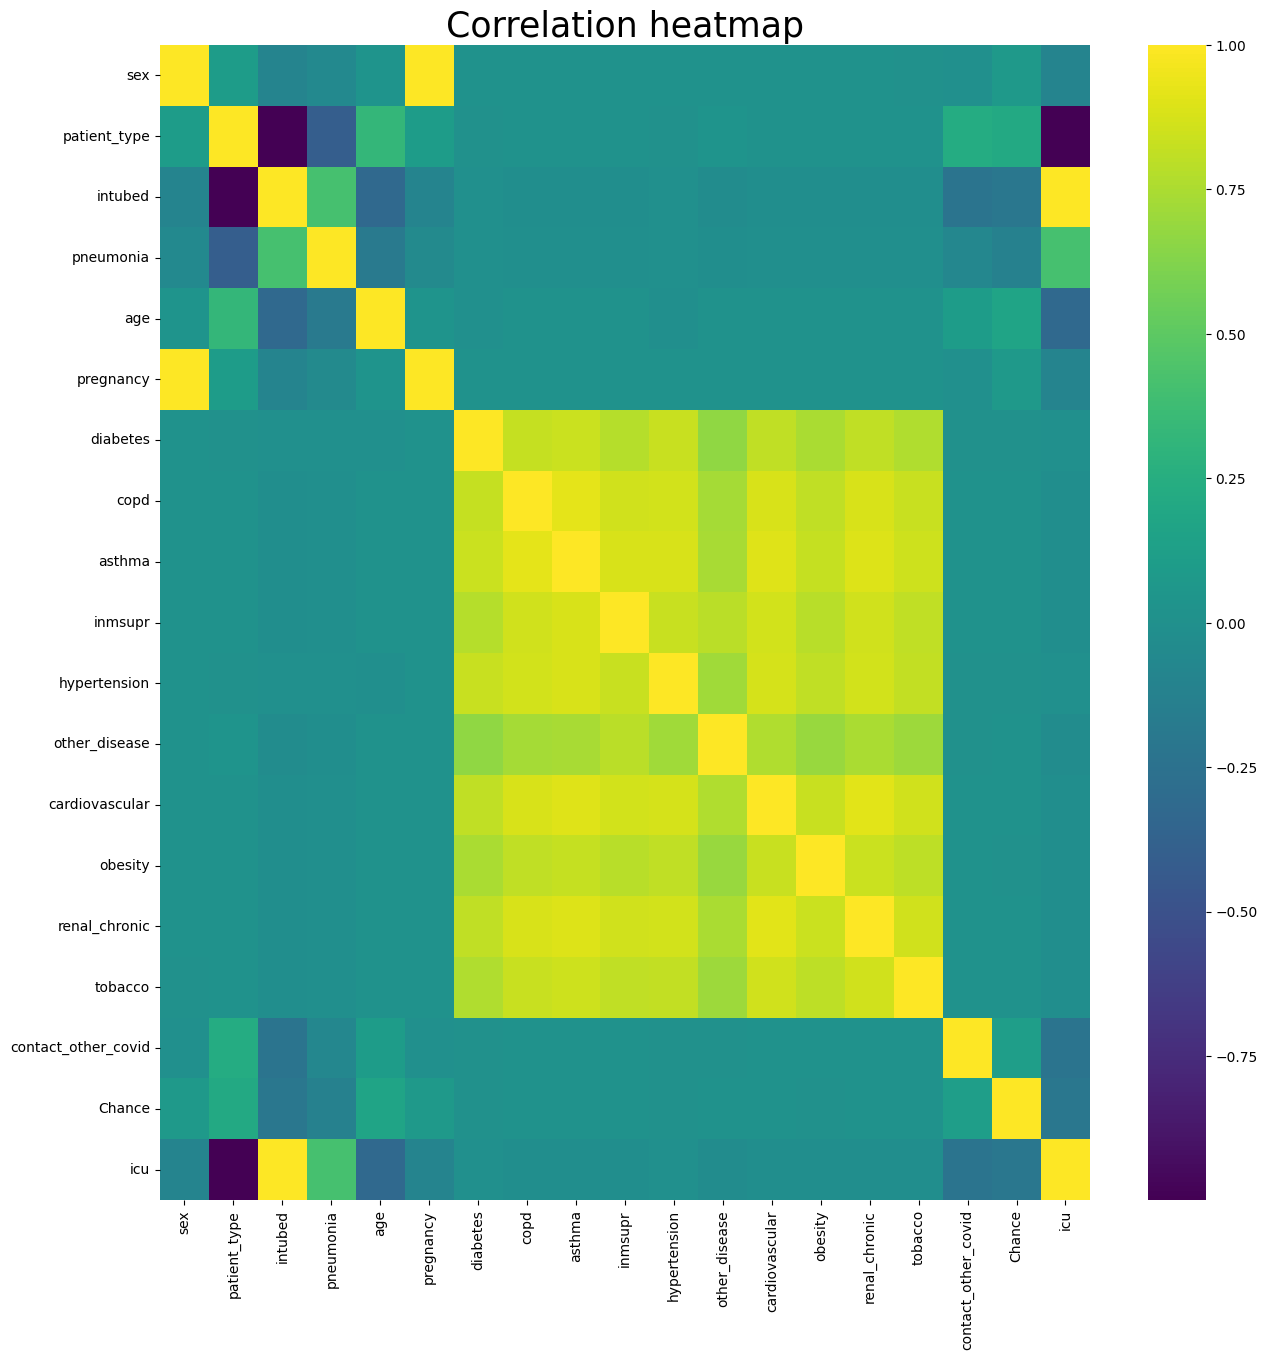

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),cmap='viridis')
plt.title('Correlation heatmap',size=25)

In [ ]:
features=['sex', 'patient_type', 'intubed', 'pneumonia', 'age', 'pregnancy',
       'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'contact_other_covid', 'icu']
list(enumerate(features))

[(0, 'sex'),
 (1, 'patient_type'),
 (2, 'intubed'),
 (3, 'pneumonia'),
 (4, 'age'),
 (5, 'pregnancy'),
 (6, 'diabetes'),
 (7, 'copd'),
 (8, 'asthma'),
 (9, 'inmsupr'),
 (10, 'hypertension'),
 (11, 'other_disease'),
 (12, 'cardiovascular'),
 (13, 'obesity'),
 (14, 'renal_chronic'),
 (15, 'tobacco'),
 (16, 'contact_other_covid'),
 (17, 'icu')]

Training begins

In [ ]:
train=df[['sex', 'patient_type', 'intubed', 'pneumonia', 'age', 'pregnancy',
       'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'contact_other_covid', 'icu']]

In [ ]:
test=df['Chance']
train=train.values
test=np.array(test)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(train,test,test_size=0.2,random_state=42,stratify=test)
print("Size of X_train is:{}\nSize of Y_train is:{}\nSize of X_test is:{}\nSize of Y_test is:{}\n".format(x_train.shape,
                                      y_train.shape,
                                      x_test.shape,
                                      y_test.shape
                                      ))

Size of X_train is:(399753, 18)
Size of Y_train is:(399753,)
Size of X_test is:(99939, 18)
Size of Y_test is:(99939,)



In [ ]:
from sklearn.ensemble import RandomForestClassifier
Random_forest = RandomForestClassifier(n_estimators=50)
Random_forest.fit(x_train,y_train)
randomForest_predict = Random_forest.predict(x_test)
randomForest_score = metrics.accuracy_score(y_test, randomForest_predict)
print("Random Forest Score :",randomForest_score)

Random Forest Score : 0.6259418245129529
